STEP 1: describe the data

In [2]:
# description about the project : this machine learning basedprogram predicts if a passenger on the titanic will survive or not .
# about the data : data downloded from kaggle website . link :https://www.kaggle.com/c/titanic/ . it has 3 csv file (train, test,gender_submission)
#we are going to implemet models on train dataset , and thats how we will train our machine using train dataset , after that we will use test file to predict whether someone will survive or not
# the titanic data is used here to predict passanger who will survive . the dataset contains 13 colum where survived is label data and others are feature . based on those feature we will predict which type of passenger will survive
# so this is an classification type problem.because they have to predict yes or no .

In [2]:
#importing libraries 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

#those python libraries are used to performing mathematical operation ,data analysis and programmatic plot generations.

In [3]:
#load the data
training = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')\




data uploaded in google colab repository , after that using the read data python function i have copied the path of train and test data in the " file name " .


In [4]:
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN
all_data = pd.concat([training,test])





In [5]:
%matplotlib inline
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

STEP 2: Initial Exploration of the data (print data, visualize data). Find number of
attributes, number of records in the data. Also find if there is any attribute
which has missing data.

In [6]:
# print the fist 10 rows of the data 
training.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,1


In [7]:
#count the no of rows and columns in the dataset 
training.shape

(891, 13)

So this dataset contains 891 rows which means 891 passengers and their information and 13 columns (features)

In [8]:
# statistical view of  numerical data column 
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


Here age column missing few values as it is 714 rather than 891. from this we can observe age feature missed 177 values. the maximum age is 80 , and minimum 0.42 which means child . using the describe function it shows the statistical information of the data . from where we can observe that the higest fare and lowest fare ans do on.

STEP 3: Find correlation of data attributes and target variable (whether survived or
not) to explore which attributes have most effects on output (target
variable).

In [9]:
#get a count of the no of survivors 
training['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

0 means not survive and 1 means survived . so total 342 passengers survived , using counts function, it counts the parameter that is given . as the survived parameter has two value , it count how many 1 it contains and how many 0 it contains.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


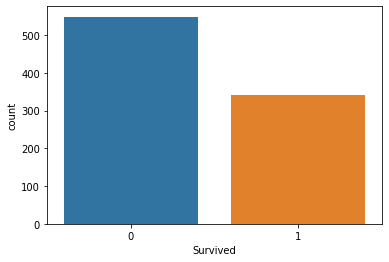

In [10]:
#visualize the count of survivors 
sns.countplot(training['Survived'])

countplot plotted the view of how many people survived and not survived , from where we can see that 0 or not survival; rate is high which is above 500 and survival count below 400 .

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

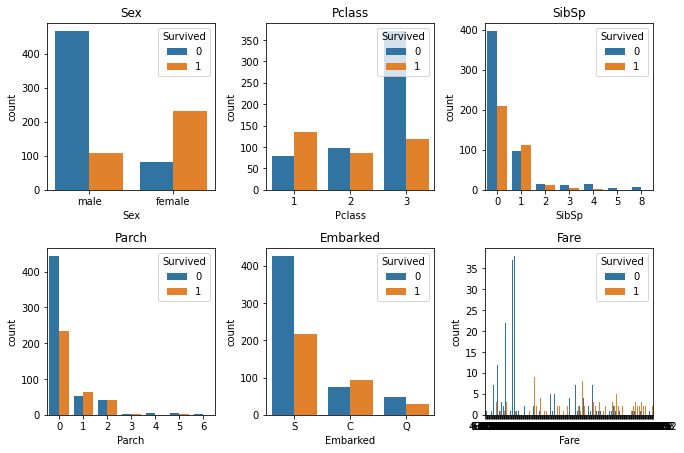

In [11]:
#visualize the count of  survivors for column  'passenger','pclass','name','sex','age','sibsp','Parch','ticket','Fare','Cabin','Embarked'.
cols=('Sex','Pclass','SibSp','Parch','Embarked','Fare')
n_rows=2
n_cols=3
#the subplot grid and figure size of each plot
fig, axs =plt.subplots(n_rows, n_cols , figsize=(n_cols*3.2,n_rows*3.2))

for r in range(0,n_rows):
  for c in range(0,n_cols):
    i=r*n_cols + c #index to go through the number of columns 
    ax = axs[r][c] #show where to position each sub plot 
    sns.countplot(training[cols[i]],hue=training['Survived'], ax=ax)
    ax.set_title(cols[i])
    ax.legend(title='Survived',loc='upper right')
    plt.tight_layout()

here we have build 6 subplots in 2 row .which shows the survival vizualization according to the name of the subplots . from first subplot we can assume that female  have most survival possibility compared to male.then from second subplot we can see that third pclass not survival rate is high wherears first class survival rate is high. assumption of third subplot is having no spouse or sibling results highly not surviving result , on the other hand having at least one sibsp have high survival rate.from embarked plot people from s part have high not surviving rate, and from fare subplot ,people with less fare have high niot surviving rate , and high fare have has high surviving rate . i have chosen the function to show subplots in two row and 3 column  as there is 6 subplots . 3*2=6 

In [12]:
# lets look at survival rate by sex 
training.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


so, 74 percent women survived which is very high , and 18 percent men survived, using groupby function,it shows the survival rate group by sex .from where we can assume that the female has high survival rate .

In [13]:
#lets look at survival rate by sex and class 
training.pivot_table('Survived',index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


women in 1st class more likely to be survived , men in third class have high chance not to survive.  this function shows survival rate group by sex and pclass . from where we can visialize the survival rate  group by sex and pclass.

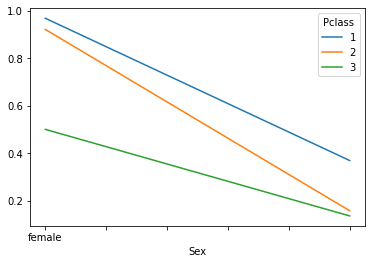

In [14]:
#lets look at survival rate by sex and class visually 
training.pivot_table('Survived',index='Sex',columns='Pclass').plot()

overall survival rate of first class is high , and last class is low, visual representation of above groupby function

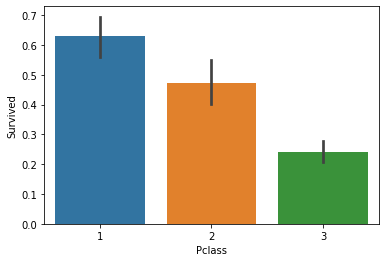

In [15]:
#now plot the survival rate of each class
sns.barplot(x='Pclass',y='Survived',data=training )

it generates a barplot of survival rate of pclass .from where we can see that 1st class survival rate is very high.so, first class has survival rate of above 60 percent and third class has survival rate of below 30 percent

In [16]:
#look at survival rate by sex, age and class 
age=pd.cut(training['Age'],[0,18,80])
training.pivot_table( 'Survived',['Sex',age],'Pclass')


Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

so, between 18 and 89 first class women has more survival rate.and age of fisrt class male between 0 to 18 has more survival rate .

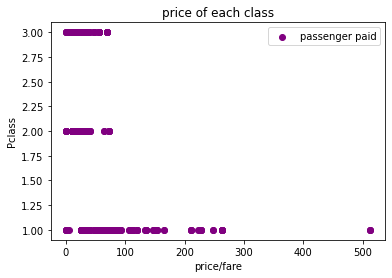

In [17]:
#plot the prices paid of each class 
plt.scatter(training['Fare'], training['Pclass'],color='purple',label='passenger paid')
plt.ylabel('Pclass')
plt.xlabel('price/fare')
plt.title('price of each class')
plt.legend()
plt.show()

orange color dots represents price of each class . where 1st class price is high . so its acts like corresponding changes in those two features.

In [18]:
#count the empty values in each column
training.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
train_test       0
dtype: int64

age column is missing 177 values, embarked is missing 2 , cabin is missing 687 and train_test missing 2 values . isna() function calculates the sum of null values of each features.

In [19]:
#look at all of the values in each column and get a count 
for val in training:
  print(training[val].value_counts())
  print()


891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

0    549
1    342
Name: Survived, dtype: int64

3    491
1    216
2    184
Name: Pclass, dtype: int64

Baclini, Miss. Helene Barbara       1
Bowen, Mr. David John "Dai"         1
Rood, Mr. Hugh Roscoe               1
Cribb, Mr. John Hatfield            1
Morley, Mr. William                 1
                                   ..
Jussila, Mr. Eiriik                 1
Caram, Mrs. Joseph (Maria Elias)    1
Asim, Mr. Adola                     1
McCormack, Mr. Thomas Joseph        1
Weir, Col. John                     1
Name: Name, Length: 891, dtype: int64

male      577
female    314
Name: Sex, dtype: int64

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibS

this fuction used here to see if one features has exactly same tuples or not .if  similiar features occur then we need to drop one feature as its a redundant value and there is no effect on the prediction performance rather it increases the computation time .

In [20]:
 corr_matrix = training.corr()
corr_matrix["Survived"].sort_values(ascending=False)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
train_test          NaN
Name: Survived, dtype: float64

correlation to see  a feature has how much negative or positive effect on the prediction performance . but if the value is 0.00000 then it does not have any effect on the prediction performnace . if the value is 0.012 means slightly changes could happen , so we will include this too . but passengerId has -0.005007 value which means very slight or no effect , so we will  not include this feature.

In [21]:
#drop redundant columns
training = training.drop(['PassengerId', 'Name','Cabin','Ticket',], axis=1)
#remove the rows with missing values 
training = training.dropna( subset = ['Embarked']) 
median = training["Age"].median() 
training["Age"].fillna(median, inplace=True)



using drop function ihave dropped the column passengerid , name, cabin, ticket . where passengerid and name and ticket dont have any positive impact on prediction rather it lowers the accuracy percentage . cabin contains a lot of null vale so its better to drop this column. using dropna function we have droped the null rows of embarked , as it contains categorical value , we cant repplace the null value with median bvalue . in the age column we have replaced the null values with median value of age .thats how i have preprocessed my data . 

In [22]:
#count the new no of rows and columns in the dataset
training.shape

(889, 9)

after dropping 4 coloumns it becomes 9 column which was before 13. and dropping 2 rows it becomes 889 which was before 891.

In [23]:
#count the empty values in each column
training.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
train_test    0
dtype: int64

now there is no null value in those 9 columns.

In [24]:
#look at the datatypes
training.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked       object
train_test      int64
dtype: object

we can  see that all columns have number values except embarkedand sex column. lets convert it to no values

In [25]:
#print the unique values in the columns

print(training['Embarked'].unique())

print(training['Sex'].unique())


['S' 'C' 'Q']
['male' 'female']


In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

#encode the embarked column
training.iloc[:, 7] = labelencoder.fit_transform( training.iloc[:, 7].values )
#encode the sex column
training.iloc[:, 2] = labelencoder.fit_transform( training.iloc[:, 2].values )




this function converts the string or object value to numericcal value .

In [27]:
#print the unique values in the columns

print(training['Embarked'].unique())
print(training['Sex'].unique())



[2 0 1]
[1 0]


converted into numerical value . embarked has [2,0,1], means it had 3 different type of categirical value , which converted to [0,1,2]. sex column had female and male , which converted to [1,0]

In [28]:
training.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked        int64
train_test      int64
dtype: object

In [ ]:
#all are numerical value .

STEP 5: Select your classification model (try at least three model to find best one)

**selected 7 classificationmodel 

In [29]:
#split the data into independent 'X' and dependent 'Y' variables
X=training.iloc[:,1:8].values #here 1:8 means column 2 to column 9
Y=training.iloc[:,0].values # here 0 means the index of survived which we want to predict

Survived column is the dependent or label of the dataset , rest of the colums are features which is independent variable . based on those features we will predict survived or not 

In [30]:
#split the dataset into 80% training and 20% testing 
from sklearn.model_selection import train_test_split 
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

STEP 6 :Perform cross validation of training data in all cases and run test data to
decide which model is best.
here i have shown all classification with cross validation 

In [31]:
#create a function with many machine learning models along with cross validation

#using logistic regression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 2000)
cv = cross_val_score(lr,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())
      
    
    
    #use KNeighbours
from sklearn.neighbors import KNeighborsClassifier 

knn = KNeighborsClassifier()
cv = cross_val_score(knn,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

    #use svc (linear kernel)
from sklearn.svm import SVC

svc = SVC(probability = True)
cv = cross_val_score(svc,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())
     

     
     #use gaussianNB
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
cv = cross_val_score(gnb,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())


     #use decision tree 
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state = 1)
cv = cross_val_score(dt,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())


     #use the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 1)
cv = cross_val_score(rf,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

# use XGBClassifier
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state =1)
cv = cross_val_score(xgb,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())


 

[0.81818182 0.78169014 0.79577465 0.75352113 0.79577465]
0.78898847631242
[0.6993007  0.6971831  0.66197183 0.71830986 0.69014085]
0.6933812666207032
[0.69230769 0.64788732 0.67605634 0.65492958 0.68309859]
0.6708559046587217
[0.79020979 0.75352113 0.78873239 0.77464789 0.8028169 ]
0.781985620013789
[0.74125874 0.73239437 0.78873239 0.78873239 0.80985915]
0.7721954102235792
[0.82517483 0.78169014 0.79577465 0.78169014 0.8028169 ]
0.7974293312321482
[0.85314685 0.75352113 0.83098592 0.78169014 0.80985915]
0.8058406382350045


as it is an classification problem . we have used 7 classification model and also perform cross validation in all models. from the cross validation score we can see that XGBClassifier performs best , the accuracy is 0.805.

In [32]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('lr',lr),('knn',knn),('rf',rf),('gnb',gnb),('svc',svc),('xgb',xgb)], voting = 'soft') 

Voting classifier takes all of the inputs and averages the results, so that we can get to know the average result of all the models .

In [33]:
cv = cross_val_score(voting_clf,X_train,Y_train,cv=5)
print(cv)
print(cv.mean())

[0.85314685 0.78169014 0.81690141 0.8028169  0.8028169 ]
0.8114744410519059


here is the average result which is 0.81288

STEP 6:Try techniques like Grid Search etc. mentioned in the chapter 2 of textbook
(TB2) to further fine tune your model. Examine whether fine tuning improve
your prediction performance

In [34]:
#Grid search technique for fine tuning the model 
from sklearn.model_selection import GridSearchCV 

gridsearch is used for fine tuning of model that used in the dataset . gridsearch model improves the prediction performance .

In [35]:
#simple performance reporting function
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [36]:
#gridsearch on logistic regression model

lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train,Y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Logistic Regression
Best Score: 0.7890081749236679
Best Parameters: {'C': 4.281332398719396, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    1.3s finished


performance did not improve . it remains same as before

In [38]:
#gridsearch on KneighborsClassifier
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [3,5,7,9],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train,Y_train)
clf_performance(best_clf_knn,'KNN')

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KNN
Best Score: 0.7384516891559144
Best Parameters: {'algorithm': 'ball_tree', 'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}


[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    0.8s finished


performance changes signifcantly , previous score is 0.693 after performing gridsearch it becomes 0.738, so improved

In [39]:
#gridsearch on SVC
svc = SVC(probability = True)
param_grid = tuned_parameters = [{'kernel': ['rbf'], 'gamma': [.1,.5,1,2,5,10],
                                  'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['linear'], 'C': [.1, 1, 10, 100, 1000]},
                                 {'kernel': ['poly'], 'degree' : [2,3,4,5], 'C': [.1, 1, 10, 100, 1000]}]
clf_svc = GridSearchCV(svc, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_svc = clf_svc.fit(X_train,Y_train)
clf_performance(best_clf_svc,'SVC')

Fitting 5 folds for each of 55 candidates, totalling 275 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    4.6s
[Parallel(n_jobs=-1)]: Done 275 out of 275 | elapsed: 55.5min finished


SVC
Best Score: 0.8030631340490496
Best Parameters: {'C': 1000, 'degree': 2, 'kernel': 'poly'}


gridsearch of svc gives 0.80 percent score which was before 0.67 percent , so it makes large difference 

In [40]:
#gridsearch on randomforest classifier
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train,Y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed:  9.9min finished


Random Forest
Best Score: 0.8283561508913622
Best Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 550}


 the score was before 0.79 , now it is 0.82 which also makes huge difference in the performance 

In [41]:
# gridsearch on XGBClassifier
xgb = XGBClassifier(random_state = 1)

param_grid = {
    'n_estimators': [450,500,550],
    'colsample_bytree': [0.75,0.8,0.85],
    'max_depth': [6],
    'reg_alpha': [1],
    'reg_lambda': [2, 5, 10],
    'subsample': [0.55, 0.6, .65],
    'learning_rate':[0.5],
    'gamma':[.5,1,2],
    'min_child_weight':[0.01],
    'sampling_method': ['uniform']
}

clf_xgb = GridSearchCV(xgb, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_xgb = clf_xgb.fit(X_train,Y_train)
clf_performance(best_clf_xgb,'XGB')

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   40.7s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1215 out of 1215 | elapsed:  4.3min finished


XGB
Best Score: 0.8255490987885356
Best Parameters: {'colsample_bytree': 0.75, 'gamma': 2, 'learning_rate': 0.5, 'max_depth': 6, 'min_child_weight': 0.01, 'n_estimators': 450, 'reg_alpha': 1, 'reg_lambda': 5, 'sampling_method': 'uniform', 'subsample': 0.55}


So here is also best score is Same like before, it is 0.82. So The grid Search techniques fine tune my model.So fine tuning improve my prediction performance.
